In [1]:
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 5.0MB/s 


In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 授权登录，仅第一次的时候会鉴权
def login_google_drive():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  return drive

# 列出id对应目录的所有文件
# "q" 查询条件教程详见：https://developers.google.com/drive/v2/web/search-parameters
def list_file(drive, dir_id_str):
  file_list = drive.ListFile({'q': dir_id_str+" in parents and trashed=false"}).GetList()
  for file1 in file_list:
    print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))

def cache_data(cache_file_name_str, file_id_str):
  # id 替换成上一步读取到的对应文件 id
  u_data = drive.CreateFile({'id': file_id_str}) 
  
  #这里的下载操作只是缓存，不会在你的Google Drive 目录下多下载一个文件
  u_data.GetContentFile(cache_file_name_str, "text/csv")
  print(cache_file_name_str+"缓存成功")

def load_data(cache_file_name_str):
    titles = []
    print("正在加载数据...")
    with open(cache_file_name_str, "r") as f:
        for line in f.readlines():
            titles.append(line.strip())
            
    print("一共加载了 %s 个标题" % len(titles))

    return titles
def upload_data(file_name):
  f = drive.CreateFile()
  f.SetContentFile(file_name)
  f.Upload()
  print('title: %s, mimeType: %s' % (f['title'], f['mimeType']))
  
drive = login_google_drive()
list_file(drive,"'root'" )
#upload_data("reviews_desc.csv")
cache_data("res","1aezODeLRl5chx16qX2PxhJtDY9xYTGiI")
cache_data("bpr3","1X5tK3SOVd4Ihf7o_PkmZzGox1dt5C05Z")




title: bpr3.txt, id: 1X5tK3SOVd4Ihf7o_PkmZzGox1dt5C05Z, mimeType: text/plain
title: res.tar, id: 1aezODeLRl5chx16qX2PxhJtDY9xYTGiI, mimeType: application/x-tar
title: demo, id: 1b6pF63M3nQSD5kk4ZUJj4o7ugwRir34c, mimeType: application/vnd.google-apps.folder
title: pytorch_test, id: 1xTLVvBEwF0YHcXQzEVM0XECWh4nj7MJ8, mimeType: application/vnd.google-apps.folder
title: vbpr_results, id: 1d9QkDj1tpiTWlX0ZhYHp8-QDx6md8sJp, mimeType: application/vnd.google-apps.folder
title: 未命名的 Jam, id: 14UHHJj4VpXYjVDXh-P6IKuTa1nQfaJU_9A7qblh4ZTY, mimeType: application/vnd.google-apps.jam
title: bpr_results, id: 1HjQXAeFOCBkn9Kl9M_arVRGIS_1Oopdy, mimeType: application/vnd.google-apps.folder
title: Colab Notebooks, id: 1g27smc51lzWXz2ltR7KHBsH3X37iT84r, mimeType: application/vnd.google-apps.folder
title: 申请信息, id: 1aSygA4Ao0AuAJdyL9dBfxuo6yD6JSV25, mimeType: application/vnd.google-apps.folder
title: 口语, id: 1RHdwWZdE84zuZU5azdxuO1tn3fVWv35E, mimeType: application/vnd.google-apps.folder
title: 听力, id: 1P83i

In [5]:
!tar xvf res res

res/
res/bpr/
res/bpr/bpr.txt
res/bpr/bpr1.txt
res/bpr/bpr2.txt
res/bpr/bpr_res.txt
res/bpr/logs_bpr.tar
res/bpr/logs_bpr1.tar
res/bpr/logs_bpr2.tar
res/bpr_cold/
res/bpr_cold/bpr_cold.txt
res/hbpr/
res/hbpr/hbpr.txt
res/hbpr/logs_hbpr.tar
res/vbpr/
res/vbpr/logs_vbpr1.tar
res/vbpr/vbpr.txt
res/vbpr/vbpr1.txt
res/vbpr/vbpr2.txt
res/vbpr/vbpr_res.txt


In [6]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (77.0 kB/s)
Selecting previously unselected package tree.
(Reading database ... 130911 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [7]:
!tree res

res
├── bpr
│   ├── bpr1.txt
│   ├── bpr2.txt
│   ├── bpr_res.txt
│   ├── bpr.txt
│   ├── logs_bpr1.tar
│   ├── logs_bpr2.tar
│   └── logs_bpr.tar
├── bpr_cold
│   └── bpr_cold.txt
├── hbpr
│   ├── hbpr.txt
│   └── logs_hbpr.tar
└── vbpr
    ├── logs_vbpr1.tar
    ├── vbpr1.txt
    ├── vbpr2.txt
    ├── vbpr_res.txt
    └── vbpr.txt

4 directories, 15 files


In [0]:
!cp res/bpr/bpr1.txt bpr

## 1. 对比收敛趋势

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [0]:
loss_yy = []
for file in ["bpr","vbpr","hbpr","cbpr"]:
  with open(file, 'r',encoding="utf-8") as f:
    y = []
    lines = f.readlines()
    #flag = 1
    #loss_a = 0
    #num=0
    for li in lines:
      value = [str(s) for s in li.split(" ")]  
      if(value[0]=="iteration:"):
        loss = value[5].split(",")[0]
        y.append(float(loss))
#       if(value[0]=="iteration:"):
#         loss = value[5].split(",")[0]
#         loss_a += (float(loss))
#         num+=1
#       #print(value[1])
#         if(flag!=int(value[1])):
#           #print(flag)
#           y[flag] = loss_a/num
#           num=0
#           loss_a = 0
#           flag = value[1]  
    loss_yy.append(y)
    

In [22]:
for y in loss_yy:
  print(len(y))

2135
2081
1857
3366


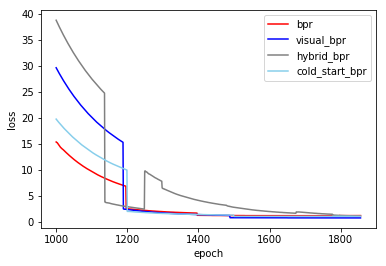

In [23]:
y0 = loss_yy[0]
y1 = loss_yy[1]
y2 = loss_yy[2]
y3 = loss_yy[3]
start = 1000
end = 1857
x = range(start,end)
#print(y)
plt.plot(x,y0[start:end], color='red', label='bpr')
plt.plot(x,y1[start:end], color='blue', label='visual_bpr')
plt.plot(x,y2[start:end], color='grey', label='hybrid_bpr')
plt.plot(x,y3[start:end], color='skyblue', label='cold_start_bpr')
plt.legend()    
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2.对比auc指标

In [0]:
%%writefile bpr


In [33]:
auc_yy = []
#for file in ["bpr", "vbpr", "hbpr", "cbpr"]:
for file in ["bpr"]:
  with open(file, 'r') as f:
    y = []
    step = 0
    lines = f.readlines()
    auc=0
    print(file)
    for li in lines:
      value = [str(s) for s in li.split(" ")]  
      if(value[0]=="iteration:"):
        step+=1
        auc += float(value[11])
        #print(auc)
        if(step%15==0):
          auc = auc/15
          y.append(auc)
          step = 0
          auc = 0
#       if(value[0]=="iteration:"):
#         loss = value[5].split(",")[0]
#         loss_a += (float(loss))
#         num+=1
#       #print(value[1])
#         if(flag!=int(value[1])):
#           #print(flag)
#           y[flag] = loss_a/num
#           num=0
#           loss_a = 0
#           flag = value[1]  
    auc_yy.append(y)

UnicodeDecodeError: ignored

In [0]:
for a in auc_yy:
  print(len(a))
  print(a)

In [0]:
y0 = auc_yy[0]
y1 = auc_yy[1]
y2 = auc_yy[2]
y3 = auc_yy[3]
start = 0
end = 123
x = range(start,end)
#print(y)
plt.plot(x,y0[start:end], color='red', label='bpr')
plt.plot(x,y1[start:end], color='blue', label='visual_bpr')
plt.plot(x,y2[start:end], color='grey', label='hybrid_bpr')
plt.plot(x,y3[start:end], color='skyblue', label='cold_start_bpr')
plt.legend()    
plt.xlabel('epoch_batch')
plt.ylabel('auc')
plt.show()